# Calculate Percent Changes, Lags and Shifts on Time Series 
The steps will help to calculate and visualize the percent changes over different time periods. Furhtermore it helps to shift or lag the time series data forward or backward.

Typical applications for these time series manipulations range from monitoring sensor data, tracking financial assets and analyzing and predicting shopping behavior to studying cyclical events like planetary movement.

In [74]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns 
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["legend.loc"] = 'upper left'

In [75]:
# Upload your data as CSV and load as data frame
df = pd.read_csv('google.csv',                     # Insert your data here
                     parse_dates = ['Date'],       # Specify date column(s)
                     index_col = 'Date')           # Specify which column to take as index
df.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


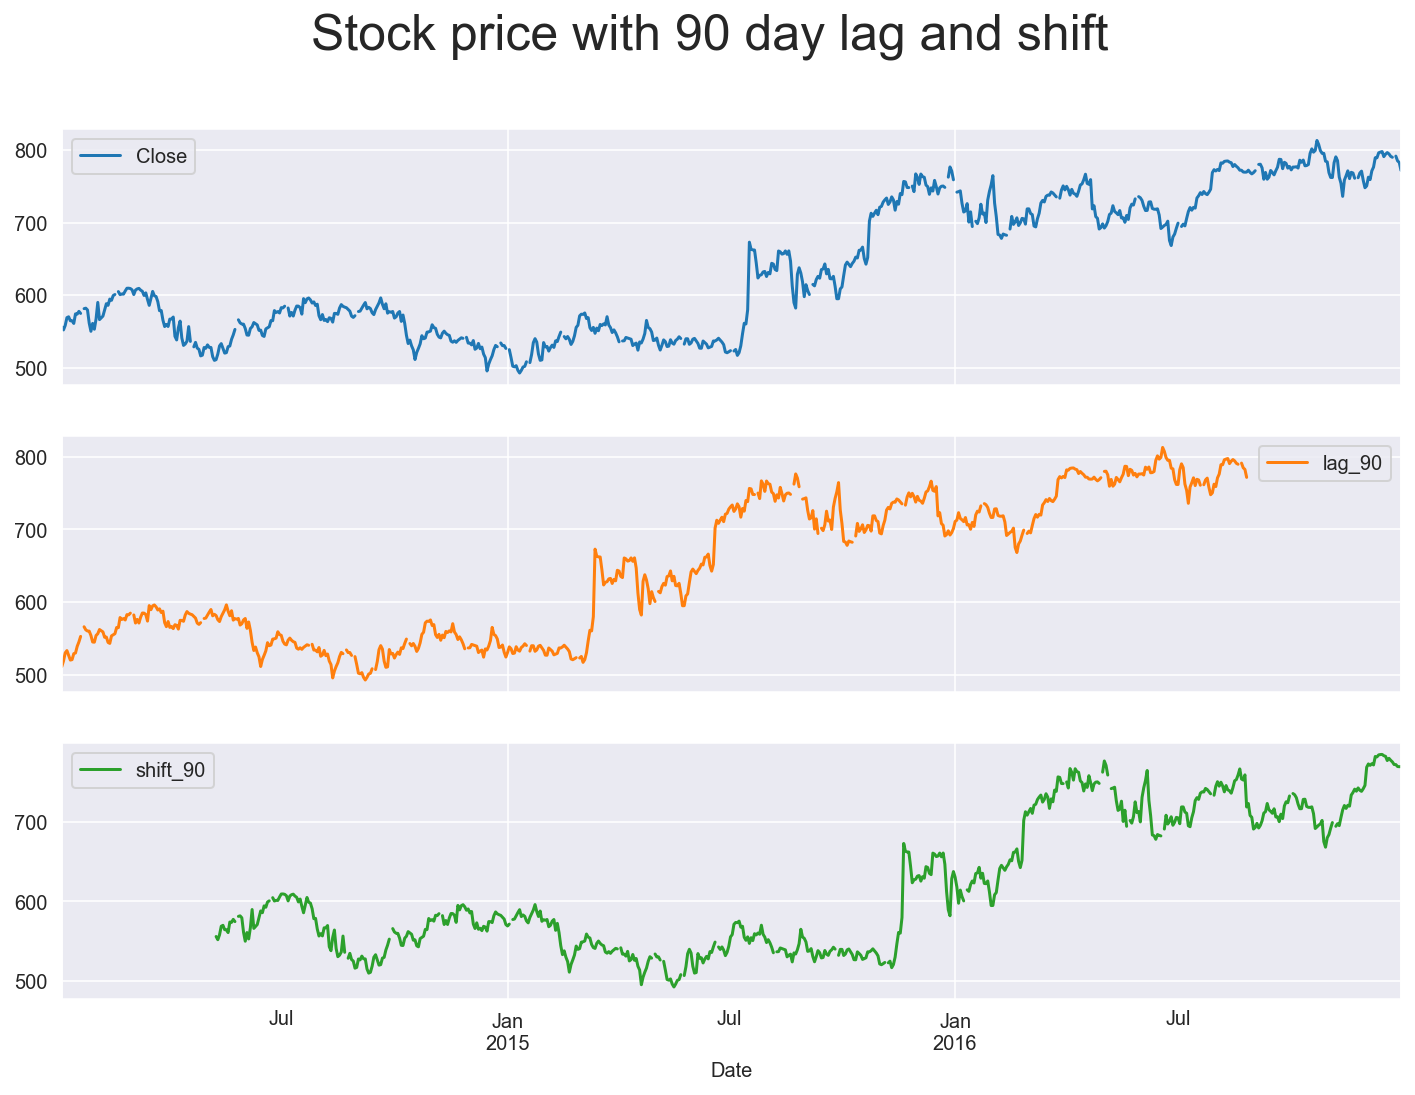

In [76]:
# Set data frequency to business daily
df = df.asfreq('B')                               # Change datetime frequency

# Create 'lagged' and 'shifted'
df['lag_90'] = df['Close'].shift(-90)             # Create a lag (backward)
df['shift_90'] = df['Close'].shift(90)            # Create a shift (forward)

# Plot the google price series
df.plot(subplots=True, legend=True)
plt.suptitle("Stock price with lag and shift",    # Set plot title
             size=25)
plt.show()

# Drop newly created rows
df.drop(['lag_90', 'shift_90'], axis=1, inplace=True)

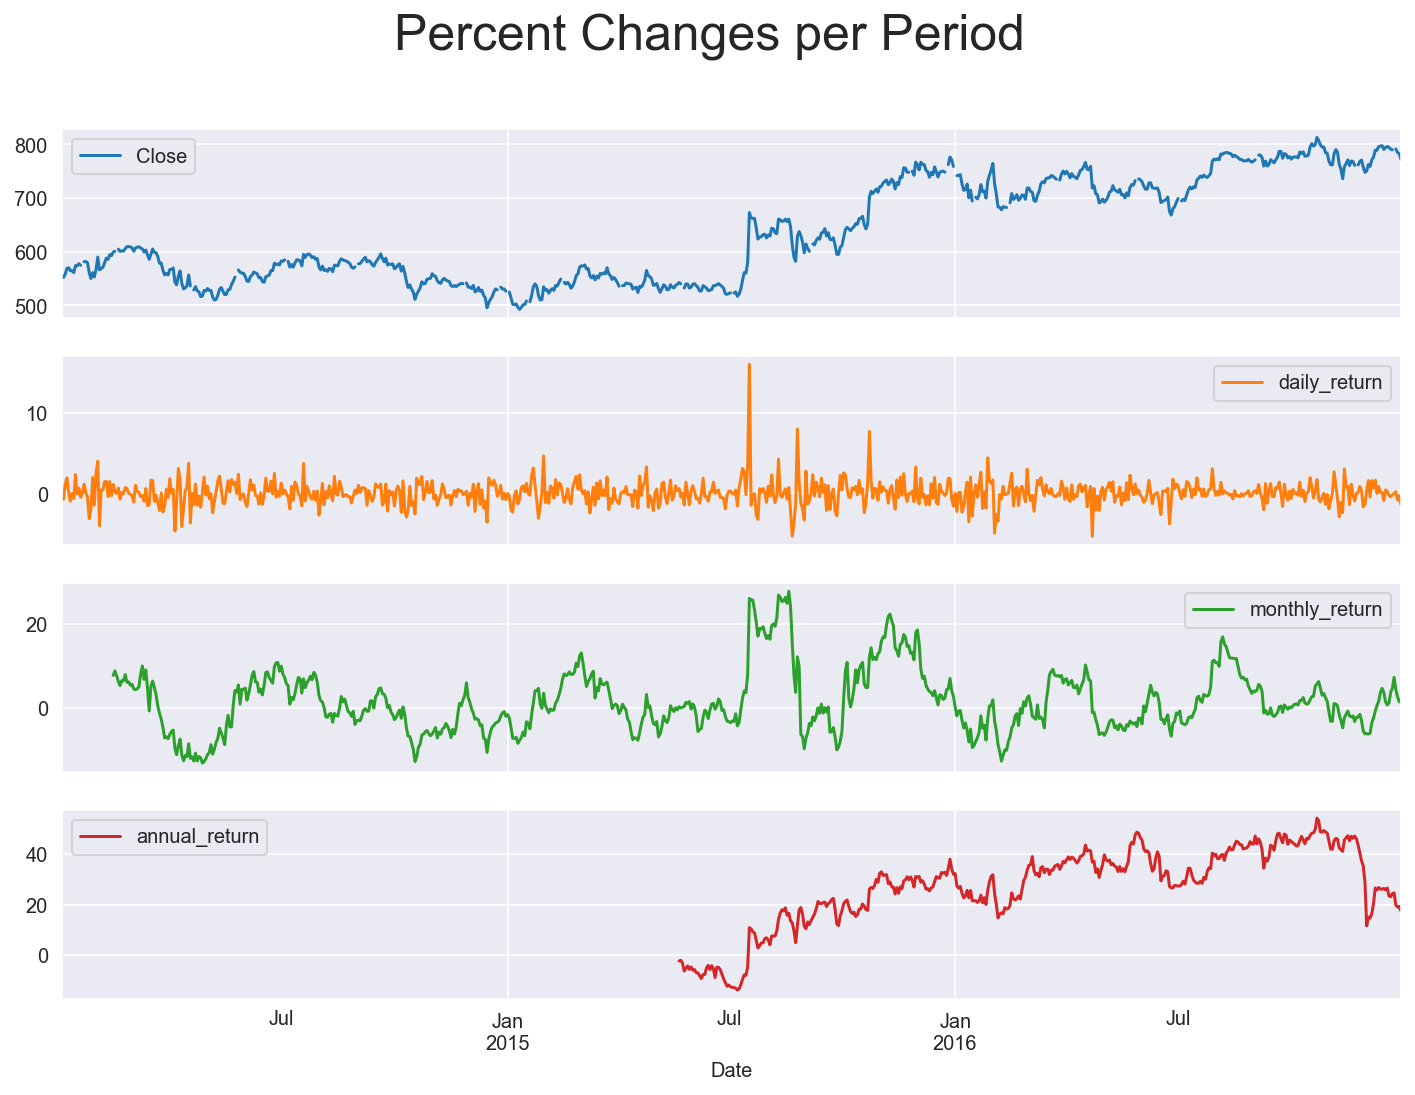

In [77]:
# Create daily_return
df['daily_return'] = df['Close'].pct_change(1).mul(100)

# Create monthly_return
df['monthly_return'] = df['Close'].pct_change(30).mul(100)

# Create annual_return
df['annual_return'] = df['Close'].pct_change(360).mul(100)

# Plot percent changes per period
df.plot(subplots=True)
plt.suptitle('Percent Changes per Period', size=25)           
plt.show()